In [1]:
import pandas as pd #Manejo de DataFrames
import numpy as np #Manejo de listas,diccionarios,arrays
import seaborn as sns # Gtaficos rapidos cuando tenempos BD
import matplotlib.pyplot as plt ##graficos (Personalidos de graficos)

In [3]:
df= pd.read_csv("Clientes.csv")

#Descripción del conjunto de datos:

El conjunto de datos proporciona información detallada sobre clientes de un banco y su estado de abandono, indicando si han dejado de utilizar los servicios del banco. Está diseñado para permitir la exploración y el análisis de los factores que influyen en la pérdida de clientes en instituciones bancarias, así como para construir modelos predictivos que identifiquen clientes en riesgo de abandonar el banco.

#Características del conjunto de datos:

1. RowNumber: Número secuencial asignado a cada fila del conjunto de datos.

2. CustomerId: Identificador único para cada cliente.

3. Apellido: Apellido del cliente.

4. CreditScore: Puntuación crediticia del cliente.

5. Geografía: Ubicación geográfica del cliente (por ejemplo, país o región).

6. Género: Sexo del cliente.

7. Edad: Edad del cliente.

8. Antigüedad: Número de años que el cliente lleva siendo cliente del banco.

9. Saldo: Saldo de la cuenta del cliente.

10. NumOfProducts: Cantidad de productos bancarios que tiene el cliente.

11. HasCrCard: Indicador de si el cliente dispone de tarjeta de crédito (binario: sí/no).

12. IsActiveMember: Indicador de si el cliente es miembro activo (binario: sí/no).

13. Salarioestimado: Salario estimado del cliente.

14. Salido: Indicador de si el cliente ha abandonado el banco (binario: sí/no).


# Analisis Exploratorio de Datos


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


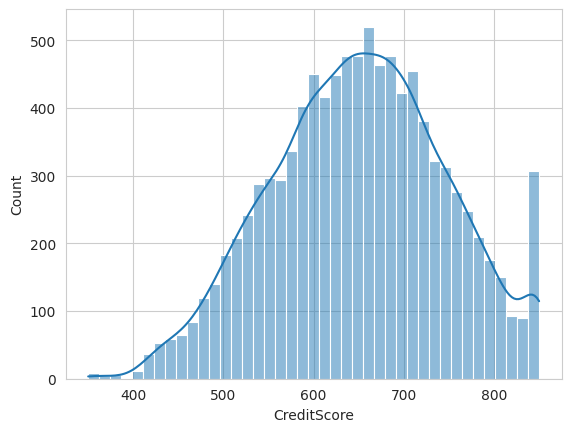

In [10]:
sns.set_style('whitegrid')
sns.histplot(df.CreditScore,kde=True)
plt.show()

<Axes: ylabel='Density'>

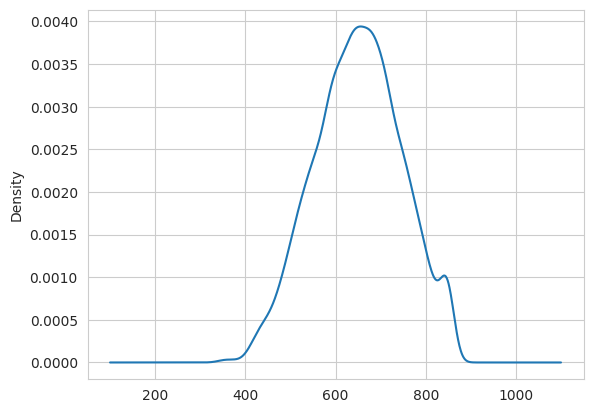

In [15]:
df['CreditScore'].plot(kind = 'kde')

<Axes: >

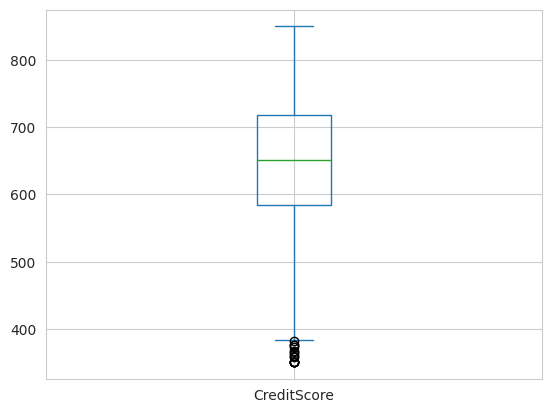

In [17]:
df['CreditScore'].plot(kind = 'box')

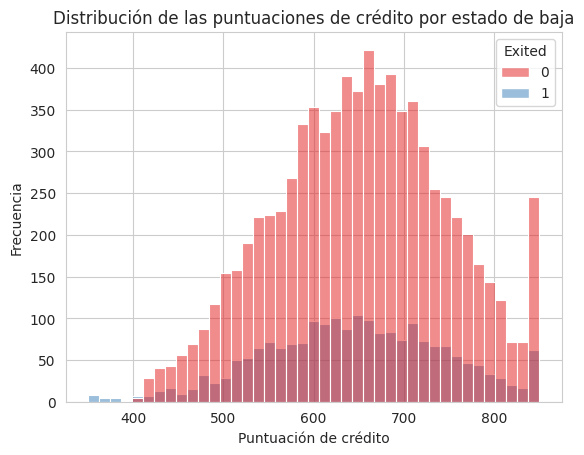

In [18]:
sns.histplot(data=df, x='CreditScore', hue='Exited', palette='Set1', kde=False)

plt.title('Distribución de las puntuaciones de crédito por estado de baja')
plt.xlabel('Puntuación de crédito')
plt.ylabel('Frecuencia')
plt.show()

De esto podemos concluir que:
La columna de puntuación crediticia sigue una distribución normal
No existe una relación estrecha entre la puntuación crediticia y la rotación de clientes, aunque los clientes con una puntuación crediticia inferior a 400 han abandonado la empresa.

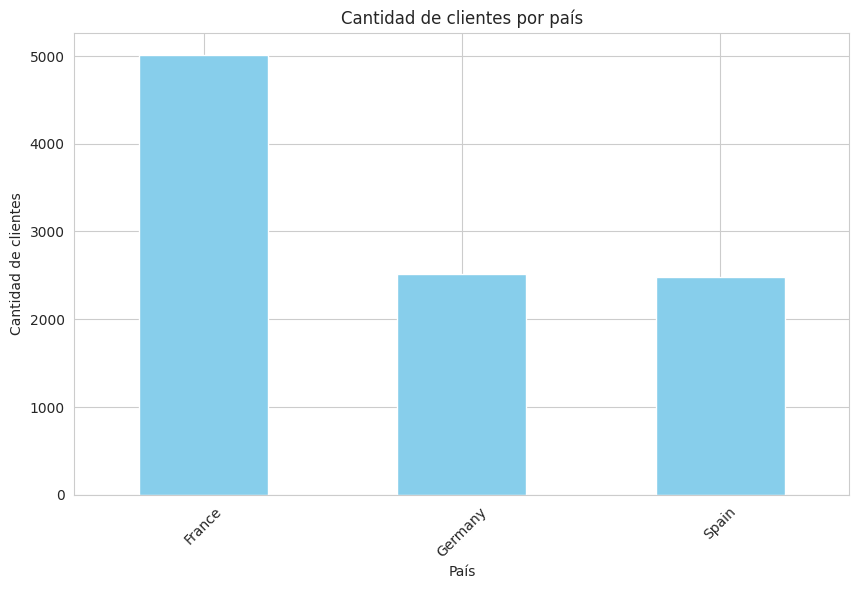

In [ ]:

clientes_por_pais = df['Geography'].value_counts()


plt.figure(figsize=(10, 6))
clientes_por_pais.plot(kind='bar', color='skyblue')
plt.title('Cantidad de clientes por país')
plt.xlabel('País')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=45)
plt.show()


Francia es el pais con mayor numero de clientes

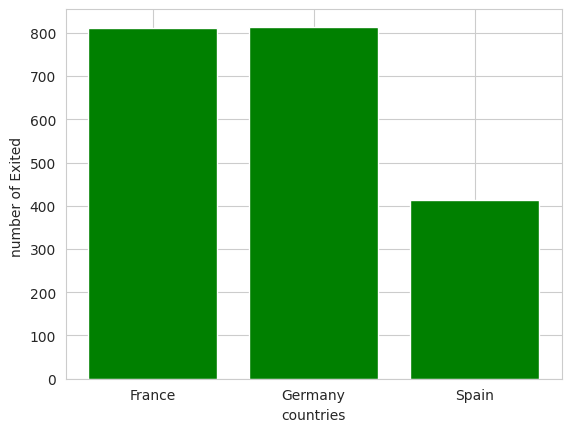

In [19]:
group_1=df[df['Exited']==1].groupby('Geography')['Geography'].value_counts()
plt.bar(group_1.index,group_1,color='green')

plt.ylabel('number of Exited ')
plt.xlabel('countries')
plt.show()

Los clientes de españa , son los que menos se van en comparacion a francia y Alemania

<Axes: ylabel='count'>

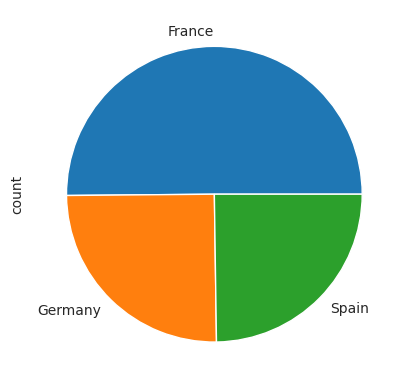

In [20]:
df['Geography'].value_counts().plot(kind = 'pie')

De todos los clientes, alrededor del 50% pertenecen a Francia, el 25% a Alemania y el 25% a España.
Lo ideal sería que la rotación de clientes no dependiera del lugar al que pertenecen, pero según los datos, el 32% de los clientes alemanes han cambiado de proveedor.

Sin embargo la idea es que el modelo funcione en base a otras caracteristicas, en todo contexto de pais y por eso no considerare que el pais es una caracteristica que influya en el abandono del banco.


<Axes: ylabel='count'>

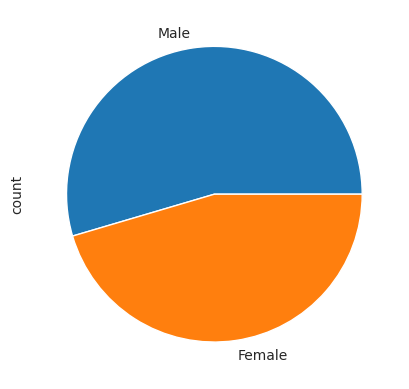

In [21]:
df['Gender'].value_counts().plot(kind = 'pie')

In [23]:
Genero= df[df['Exited'] == 1].groupby('Gender')['Exited'].value_counts()
Generos = Genero.reset_index()
Generos


,Gender,Exited,count
0,Female,1,1139
1,Male,1,898


Las mujeres tienden a salir más, que los hombres


In [24]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [25]:
pd.crosstab(df['Exited'], df['Gender'], normalize = 'columns') * 100

Gender,Female,Male
Exited,,
0,74.928461,83.544072
1,25.071539,16.455928


En función del sexo, las mujeres son más propensas a la rotación que los hombres, con una tasa de rotación del 25%.

<Axes: ylabel='Density'>

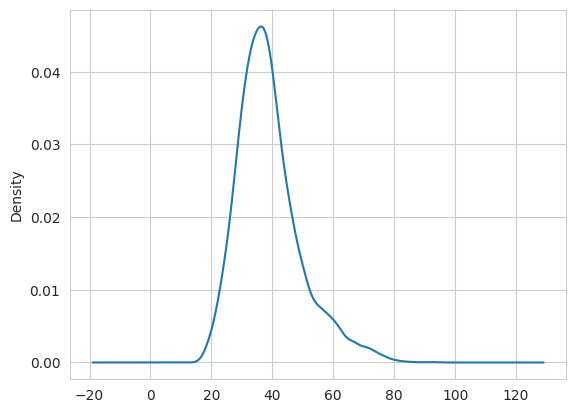

In [26]:
df['Age'].plot(kind = 'kde')

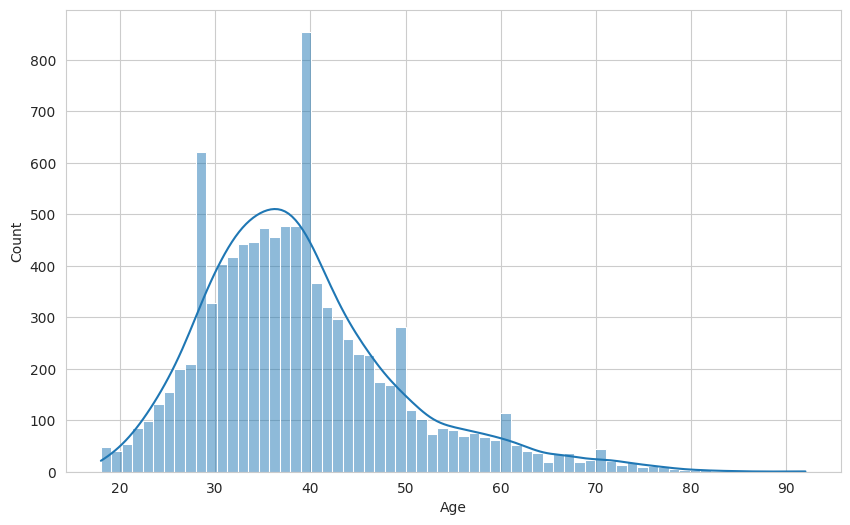

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.show()

<Axes: >

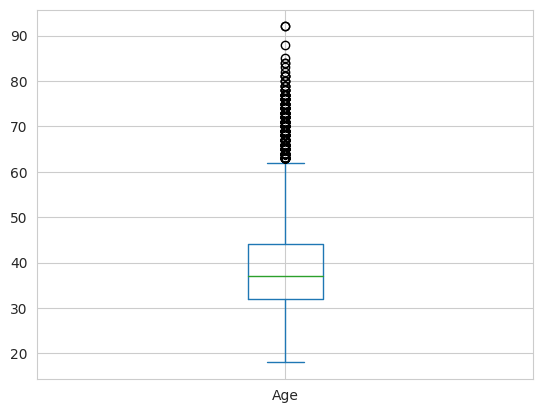

In [27]:
df['Age'].plot(kind = 'box')

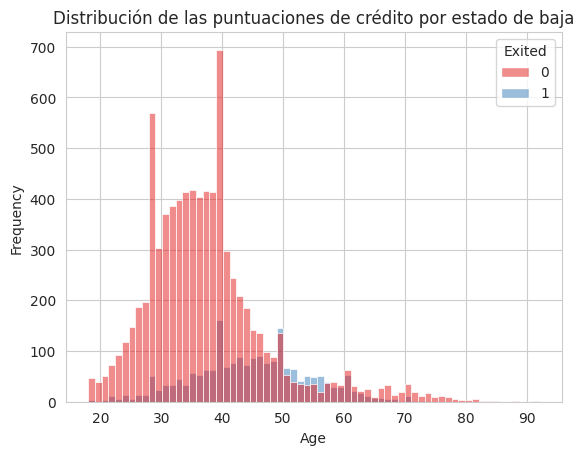

In [29]:
sns.histplot(data=df, x='Age', hue='Exited', palette='Set1', kde=False)

plt.title('Distribución de las puntuaciones de crédito por estado de baja')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

La columna de edad sigue una distribución ligeramente sesgada a la derecha.
La columna de edad contiene un gran número de valores atípicos
Es evidente que, a partir de los 35 años, aumenta el porcentaje de clientes que abandonan.

In [30]:
df['Tenure'].value_counts()/len(df) * 100

Tenure
2     10.48
1     10.35
7     10.28
8     10.25
5     10.12
3     10.09
4      9.89
9      9.84
6      9.67
10     4.90
0      4.13
Name: count, dtype: float64

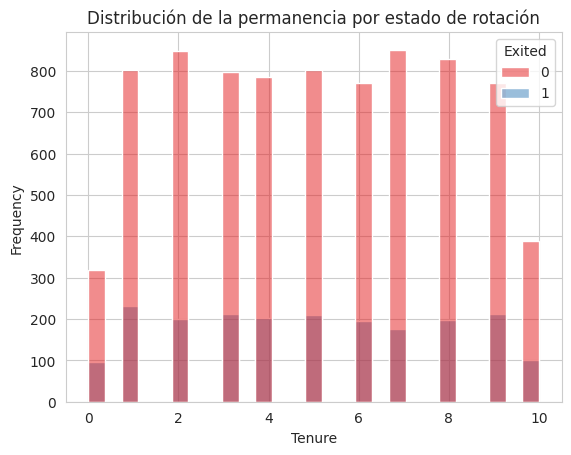

In [31]:
sns.histplot(data=df, x='Tenure', hue='Exited', palette='Set1', kde=False)

plt.title('Distribución de la permanencia por estado de rotación')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

La tasa de rotación de clientes más alta corresponde a los clientes con una antigüedad de 0 años. A medida que aumenta la permanencia, la tasa de abandono es irregular, lo que demuestra que no hay mucha relación entre la permanencia y el abandono de clientes.

In [32]:
df['NumOfProducts'].value_counts()/len(df) * 100

NumOfProducts
1    50.84
2    45.90
3     2.66
4     0.60
Name: count, dtype: float64

In [33]:
pd.crosstab(df['Exited'], df['NumOfProducts'], normalize = 'columns') * 100

NumOfProducts,1,2,3,4
Exited,,,,
0,72.285602,92.418301,17.293233,0.0
1,27.714398,7.581699,82.706767,100.0


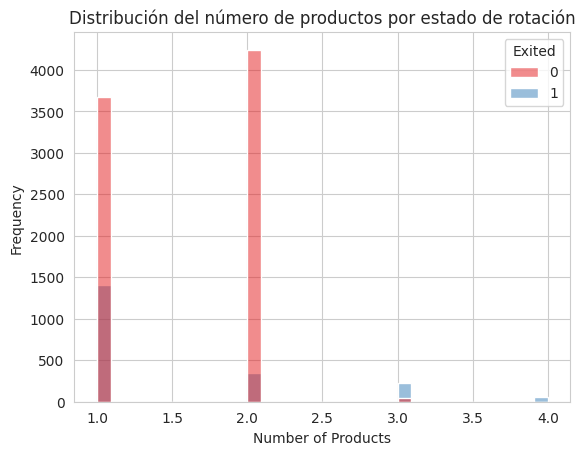

In [34]:
sns.histplot(data=df, x='NumOfProducts', hue='Exited', palette='Set1', kde=False)

plt.title('Distribución del número de productos por estado de rotación')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')
plt.show()

In [38]:
pd.crosstab(index=df['NumOfProducts'], columns=df['Exited'])


Exited,0,1
NumOfProducts,,
1,3675,1409
2,4242,348
3,46,220
4,0,60


El análisis muestra que el número de productos tiene una relación bastante buena con la tasa de rotación de clientes. La tasa de rotación de clientes es más alta entre los clientes que tienen 1 producto, es decir, el 27,7%.

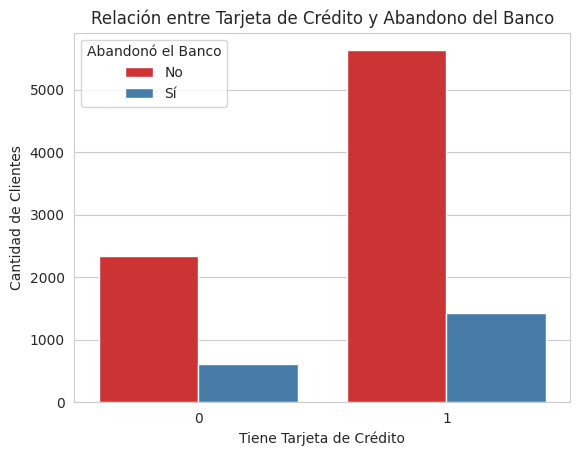

In [35]:

sns.countplot(x='HasCrCard', hue='Exited', data=df, palette='Set1')


plt.title('Relación entre Tarjeta de Crédito y Abandono del Banco')
plt.xlabel('Tiene Tarjeta de Crédito')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Abandonó el Banco', labels=['No', 'Sí'])
plt.show()

In [36]:
df['HasCrCard'].value_counts()/len(df) * 100

HasCrCard
1    70.55
0    29.45
Name: count, dtype: float64

In [37]:
pd.crosstab(df['Exited'], df['HasCrCard'], normalize = 'columns') * 100

HasCrCard,0,1
Exited,,
0,79.185059,79.815734
1,20.814941,20.184266


La análisis evidencia que tener o no tener tarjeta de crédito no tiene efecto sobre el estado de abandono de los clientes.

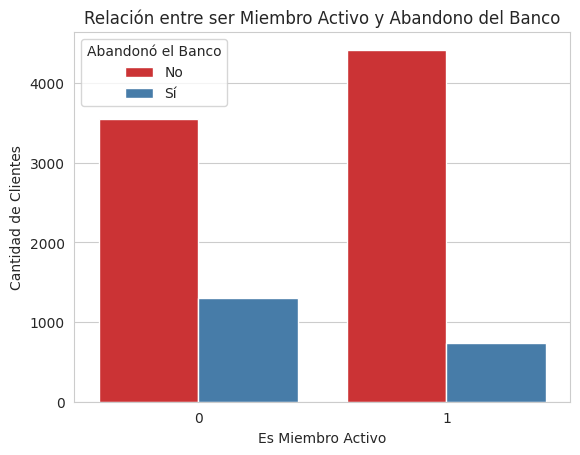

In [39]:
sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette='Set1')
plt.title('Relación entre ser Miembro Activo y Abandono del Banco')
plt.xlabel('Es Miembro Activo')
plt.ylabel('Cantidad de Clientes')
plt.legend(title='Abandonó el Banco', labels=['No', 'Sí'])
plt.show()


In [ ]:
pd.crosstab(df['Exited'],df['IsActiveMember'], normalize = 'columns') * 100

IsActiveMember,0,1
Exited,,
0,73.149103,85.730926
1,26.850897,14.269074


Los clientes que no son miembros activos tienen más probabilidades de abandonar. Según los datos, el 26,85% de los clientes que no son miembros activos han abandonado.

<Axes: ylabel='Density'>

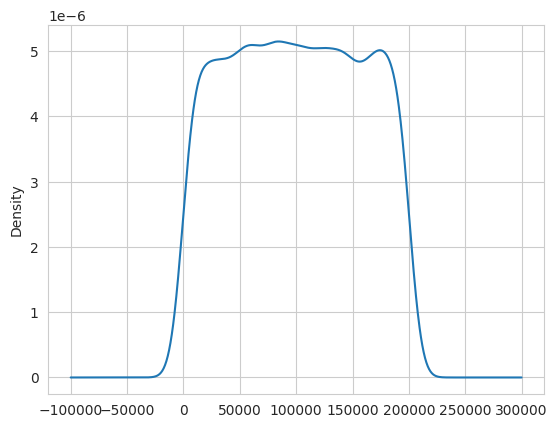

In [40]:
df['EstimatedSalary'].plot(kind = 'kde')

<Axes: >

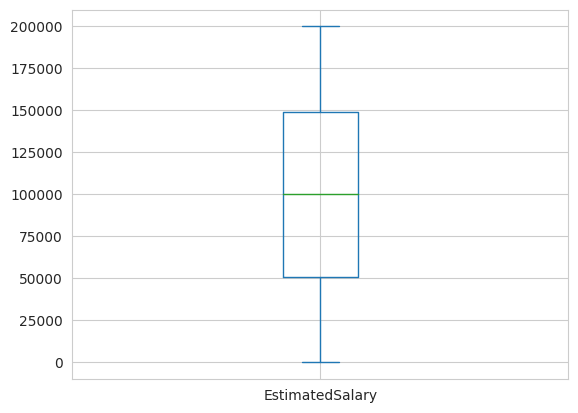

In [41]:
df['EstimatedSalary'].plot(kind = 'box')

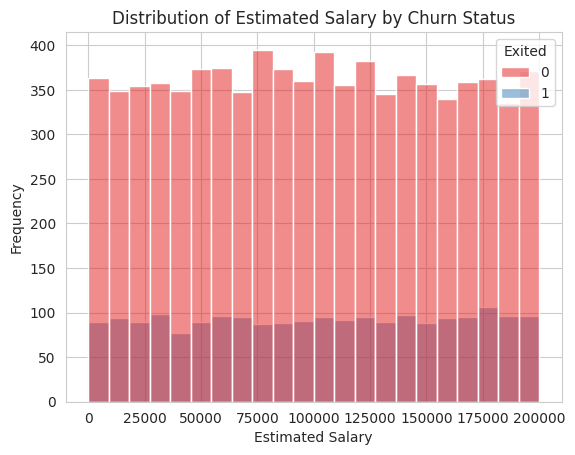

In [ ]:
sns.histplot(data=df, x='EstimatedSalary', hue='Exited', palette='Set1', kde=False)

plt.title('Distribution of Estimated Salary by Churn Status')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

* El salario estimado sigue una distribución normal.
* El salario estimado no tiene mucho efecto en el estado de pérdida de clientes.

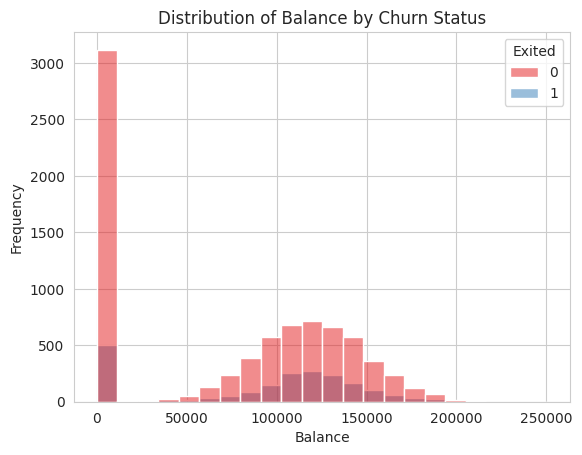

In [ ]:
sns.histplot(data=df, x='Balance', hue='Exited', palette='Set1', kde=False)

plt.title('Distribution of Balance by Churn Status')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

Las columnas de Saldo no muestran una distribución clara y parecen estar agrupadas en dos grupos distintos en lugar de seguir una distribución normal. Además, el saldo no parece ser un indicador sólido para predecir si un cliente abandonará el banco o no.

In [44]:
puntajescrediticios=df.groupby('Exited')['CreditScore'].median()
puntajescrediticios

Exited
0    653.0
1    646.0
Name: CreditScore, dtype: float64

Puntaje de crédito similar para quienes salieron y no

In [45]:
Salario=df.groupby('Exited')['EstimatedSalary'].median()
Salario

Exited
0     99645.04
1    102460.84
Name: EstimatedSalary, dtype: float64

tienen salarios medios similares

In [42]:
df.drop(['CustomerId','Surname'],axis=1,inplace=True)
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
df.drop(['RowNumber'],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [47]:
numeric_cols = df.select_dtypes(include = 'number').columns
print(numeric_cols)

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


<Axes: >

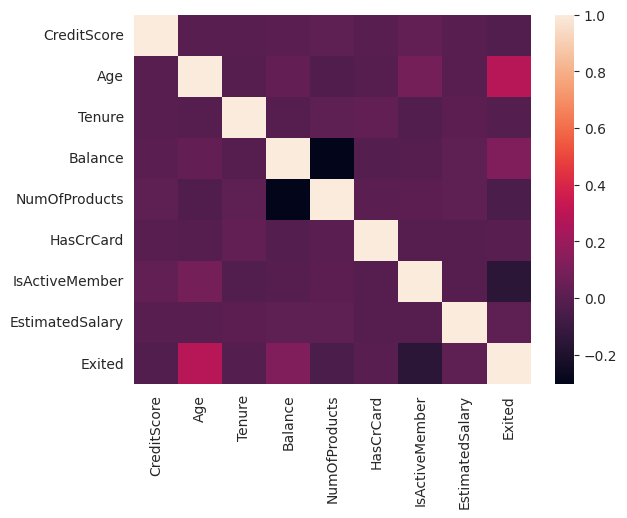

In [48]:
sns.heatmap(df[numeric_cols].corr())

In [49]:
df[numeric_cols].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


Edad (Age) y Abandono (Exited): Hay una correlación positiva moderada de 0.285 entre la edad de los clientes y si abandonaron el banco. Esto sugiere que los clientes más jóvenes tienden a abandonar el banco con mayor frecuencia que los clientes mayores.

Número de productos (NumOfProducts) y Saldo (Balance): Existe una correlación negativa moderada de -0.304 entre el número de productos bancarios que tiene un cliente y su saldo. Esto indica que los clientes con más productos bancarios tienden a tener saldos más bajos.

Miembro activo (IsActiveMember) y Abandono (Exited): Hay una correlación negativa moderada de -0.156 entre si un cliente es miembro activo y si ha abandonado el banco. Esto sugiere que los clientes que son miembros activos tienen menos probabilidades de abandonar el banco.

Puntaje crediticio (CreditScore) y Abandono (Exited): Existe una correlación negativa débil de -0.027 entre el puntaje crediticio de un cliente y si ha abandonado el banco. Esto sugiere que no hay una relación fuerte entre el puntaje crediticio y el abandono del banco.

In [50]:
df['Gender'] = df['Gender'].replace({'Male': '1', 'Female': '0'},regex=True)

In [62]:
df['Gender'] = df['Gender'].astype('int64')

In [54]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [56]:
df=df.drop(["Geography"], axis=1)

In [57]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int64  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


In [102]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Mejores hiperparámetros:", best_params)

best_accuracy = grid_search.best_score_
print("Mejor precisión:", best_accuracy)

best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)




Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Mejor precisión: 0.857375
Accuracy: 0.861
Confusion Matrix:
 [[1561   46]
 [ 232  161]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.78      0.41      0.54       393

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [103]:
# Predicciones en el conjunto de entrenamiento
y_pred_train = best_rf.predict(X_train)

# Calculamos la precisión en el conjunto de entrenamiento
train_accuracy = accuracy_score(y_train, y_pred_train)

print("Accuracy en el conjunto de entrenamiento:", train_accuracy)


Accuracy en el conjunto de entrenamiento: 0.883875


In [104]:
# Predicciones en el conjunto de datos de prueba
y_pred_test = best_rf.predict(X_test)

# Calculamos la precisión en el conjunto de datos de prueba
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Accuracy en el conjunto de datos de prueba:", test_accuracy)


Accuracy en el conjunto de datos de prueba: 0.861


In [106]:
from sklearn.metrics import recall_score

# Calculamos la sensibilidad en el conjunto de entrenamiento
train_recall = recall_score(y_train, y_pred_train)

print("Sensibilidad en el conjunto de entrenamiento:", train_recall)

# Calculamos la sensibilidad en el conjunto de prueba
test_recall = recall_score(y_test, y_pred_test)

print("Sensibilidad en el conjunto de prueba:", test_recall)


Sensibilidad en el conjunto de entrenamiento: 0.48965936739659366
Sensibilidad en el conjunto de prueba: 0.40966921119592875


Los resultados muestran del modelo de bosque aleatorio con una precisión bastante buena del 86.1% en el conjunto de prueba, utilizando los hiperparámetros óptimos encontrados. Sin embargo, hay un desbalance en la sensibilidad entre el conjunto de entrenamiento y el de prueba, lo cual sugiere que el modelo puede estar sobreajustando ligeramente los datos de entrenamiento.

La matriz de confusión y el informe de clasificación muestran que el modelo tiene un buen desempeño en la predicción de clientes que no abandonan el banco (clase 0), con una precisión del 87% y una sensibilidad del 97%. Sin embargo, el modelo tiene más dificultades para predecir los casos de abandono (clase 1), con una precisión del 78% y una sensibilidad del 41%.